# ********  IPL Dataset Analysis  ********

<img src='https://drive.google.com/uc?id=1DW0D2AfGz4Sgx1Ib7WOerCPH300HpclC' >

https://drive.google.com/uc?id=

In [1]:
# Importing the Useful Libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [11]:
# Loading Datatsets.

try:
    df_matches = pd.read_csv('input/matches.csv')
    df_deliveries = pd.read_csv('input/deliveries.csv')
except Exception as e:
    df_matches = pd.read_csv('../input/matches.csv')
    df_deliveries = pd.read_csv('../input/deliveries.csv')   

In [14]:
# Removing the unwanted columns.
try:
    df_matches.drop('umpire3', axis=1, inplace=True)
except Exception as e:
    pass


In [15]:
# Let's checkout the top 5 entries of our Dataset.
df_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


#### ====================================================================================================

## BAISC ANALYSIS

### Q1). Number of Matches played so far and Number of seasons played so far.

In [16]:
print(f"The Number of matches played so far are:-\t {df_matches.shape[1]}")
print(f"The number of seasons played so far are:-\t {df_matches['season'].nunique()}")

The Number of matches played so far are:-	 17
The number of seasons played so far are:-	 10


### Q2). Number of matches in each season.

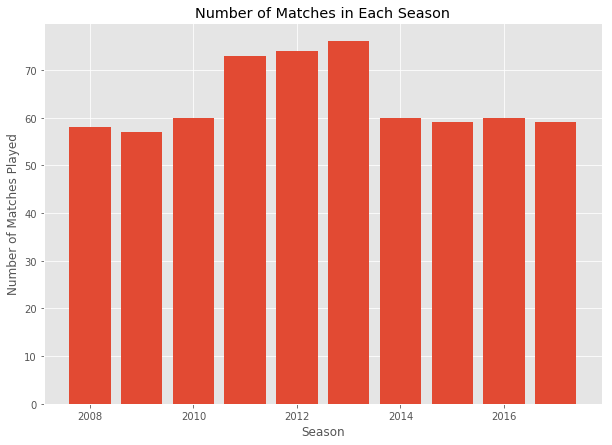

In [20]:
season = df_matches['season'].value_counts()
plt.figure(figsize=(10,7))
plt.bar(x=season.index, height=season.values)
plt.title('Number of Matches in Each Season')
plt.xlabel('Season')
plt.ylabel('Number of Matches Played')
plt.show()

* As one can see maximum number of matches played in 2011, 2012, 2013. This is the time was in very high demand.

#### =====================================================================================================

### Q3). Number of Matches in each Venue.

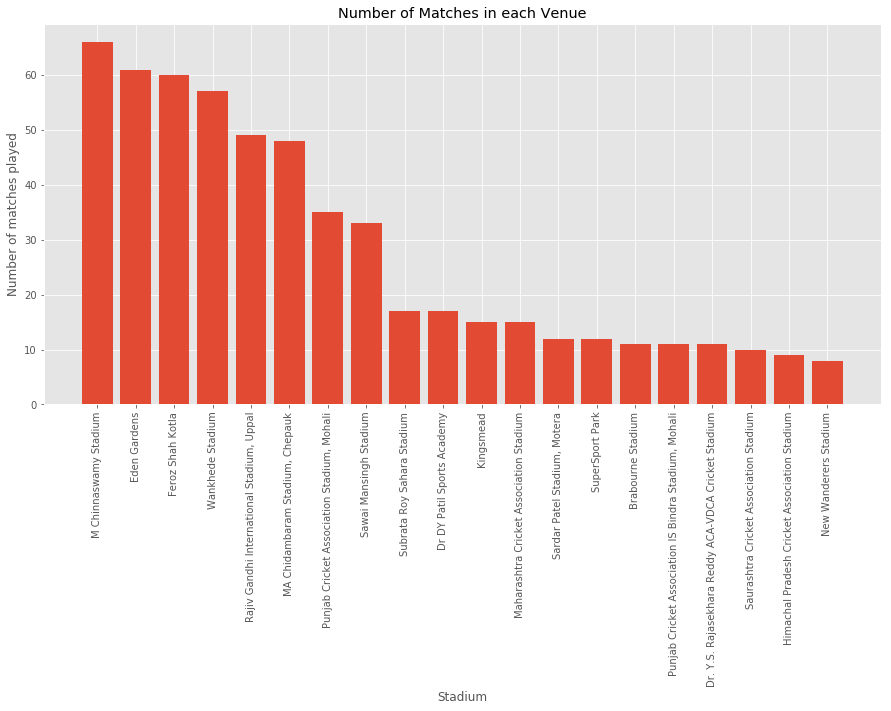

In [26]:
venue = df_matches['venue'].value_counts()[:20]
plt.figure(figsize=(15,7))
plt.bar(x=venue.index, height=venue.values)
plt.title('Number of Matches in each Venue')
plt.xlabel('Stadium')
plt.ylabel('Number of matches played')
plt.xticks(rotation=90)
plt.show()

* The maximum matches played on M Chinnaswamy stadium.
* Other favuorite stadiums are Eden Gardens(Lords of India :p) , Feroz Shah Kotla, Wankhede stadium.

#### =====================================================================================================

### Q4). Number of matches played by each team.

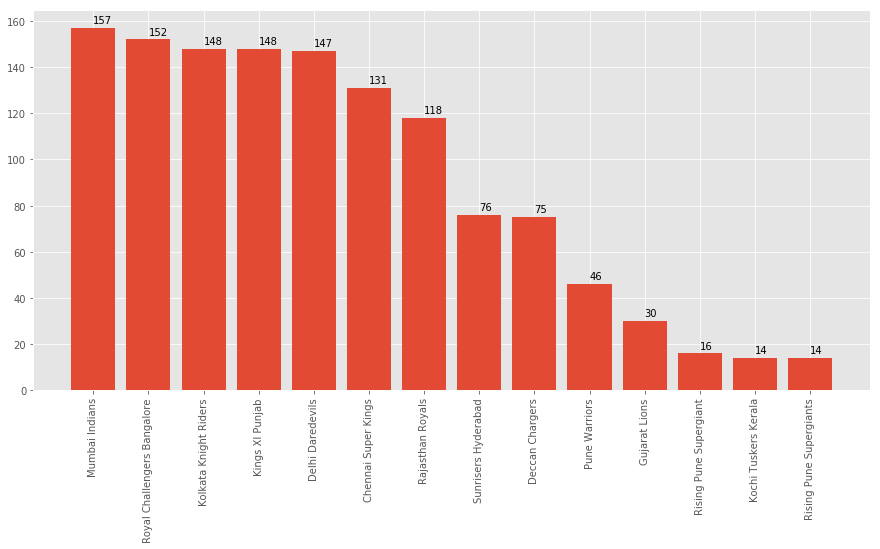

In [67]:
temp_df = pd.concat([df_matches['team1'], df_matches['team2']])

temp_df = temp_df.value_counts()
#print(temp_df)
plt.figure(figsize=(15,7))
plt.bar(x=temp_df.index, height=temp_df.values,)
plt.xticks(rotation=90)

for i,v in enumerate(temp_df.values):
    plt.text(x=i, y=v+2, s=v)

* Maximum number of matches played by Mumbai Indians, RCB, KKR.

#### ====================================================================================================

### Q5). Number of Total Matches wins per Team.

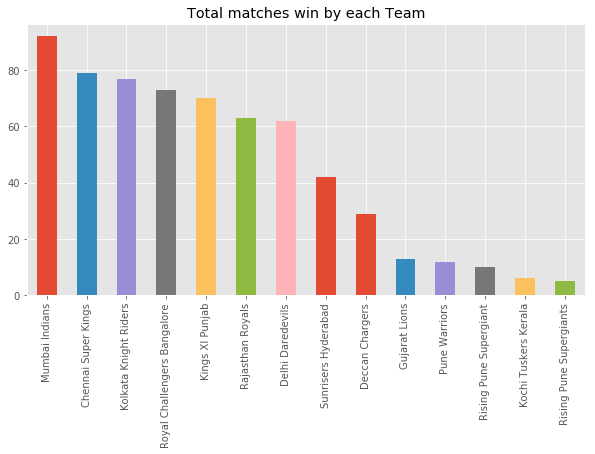

In [73]:
winner = df_matches['winner'].value_counts()
winner.plot(kind='bar', figsize=(10,5), title='Total matches win by each Team')

#### The conclusions from figrue:-
* Mumbai Indians leads the total matches won by a team.
* Chennai Super kings,KKR they are also in a race.
* RR and DD they are far behind

#### =====================================================================================================

### Q6). Champion in each season.

In [86]:
temp_df = df_matches.drop_duplicates('season', keep='last')
temp_df = temp_df[['season', 'winner']]
temp_df.reset_index(inplace=True, drop=True)
temp_df

,season,winner
0,2017,Mumbai Indians
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad


#### ====================================================================================================

### Q7). 